In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 200)

In [2]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head(1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df['Weight'].min(), df['Weight'].max()

(39.0, 165.057269)

In [3]:
display(df.head(2))
print("Shape Of The DataFrame:->",df.shape)
print("MissingValueAre:->",df.isnull().sum())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.00000,yes,yes,2.0,3.000000,Frequently,no,2.000000,no,1.0,1.000000,no,Automobile,Normal_Weight


Shape Of The DataFrame:-> (20758, 18)
MissingValueAre:-> id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


1. **Gender:** Person's gender (Male/Female).
2. **Age:** Person's age.
3. **Height:** Person's height.
4. **Weight:** Person's weight.
5. **Family History with Overweight:** Family history of overweight (Yes/No).
6. **FAVC (Vegetable Consumption):** Frequency of consuming vegetables.
7. **FCVC (High Caloric Food Consumption):** Frequency of consuming high-caloric food.
8. **NCP (Number of Main Meals):** Number of main meals per day.
9. **CAEC (Food Between Meals):** Frequency of consuming food between meals.
10. **SMOKE:** Smoking status (Yes/No).
11. **CH2O (Daily Water Consumption):** Daily water intake.
12. **SCC (Caloric Beverages):** Frequency of consuming caloric beverages.
13. **FAF (Physical Activity Frequency):** Frequency of physical activity.
14. **TUE (Technology Device Time):** Time spent using technology devices.
15. **CALC (Alcohol Consumption):** Frequency of alcohol consumption.
16. **MTRANS (Transportation Mode):** Mode of transportation.
17. **NObeyesdad (Obesity Level):** Target variable indicating obesity level.


In [4]:
numerical_columns   = [col for col in df.columns if df[col].dtype!='O']
categorical_columns = [col for col in df.columns if df[col].dtype=='O']

In [5]:
df[categorical_columns].describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


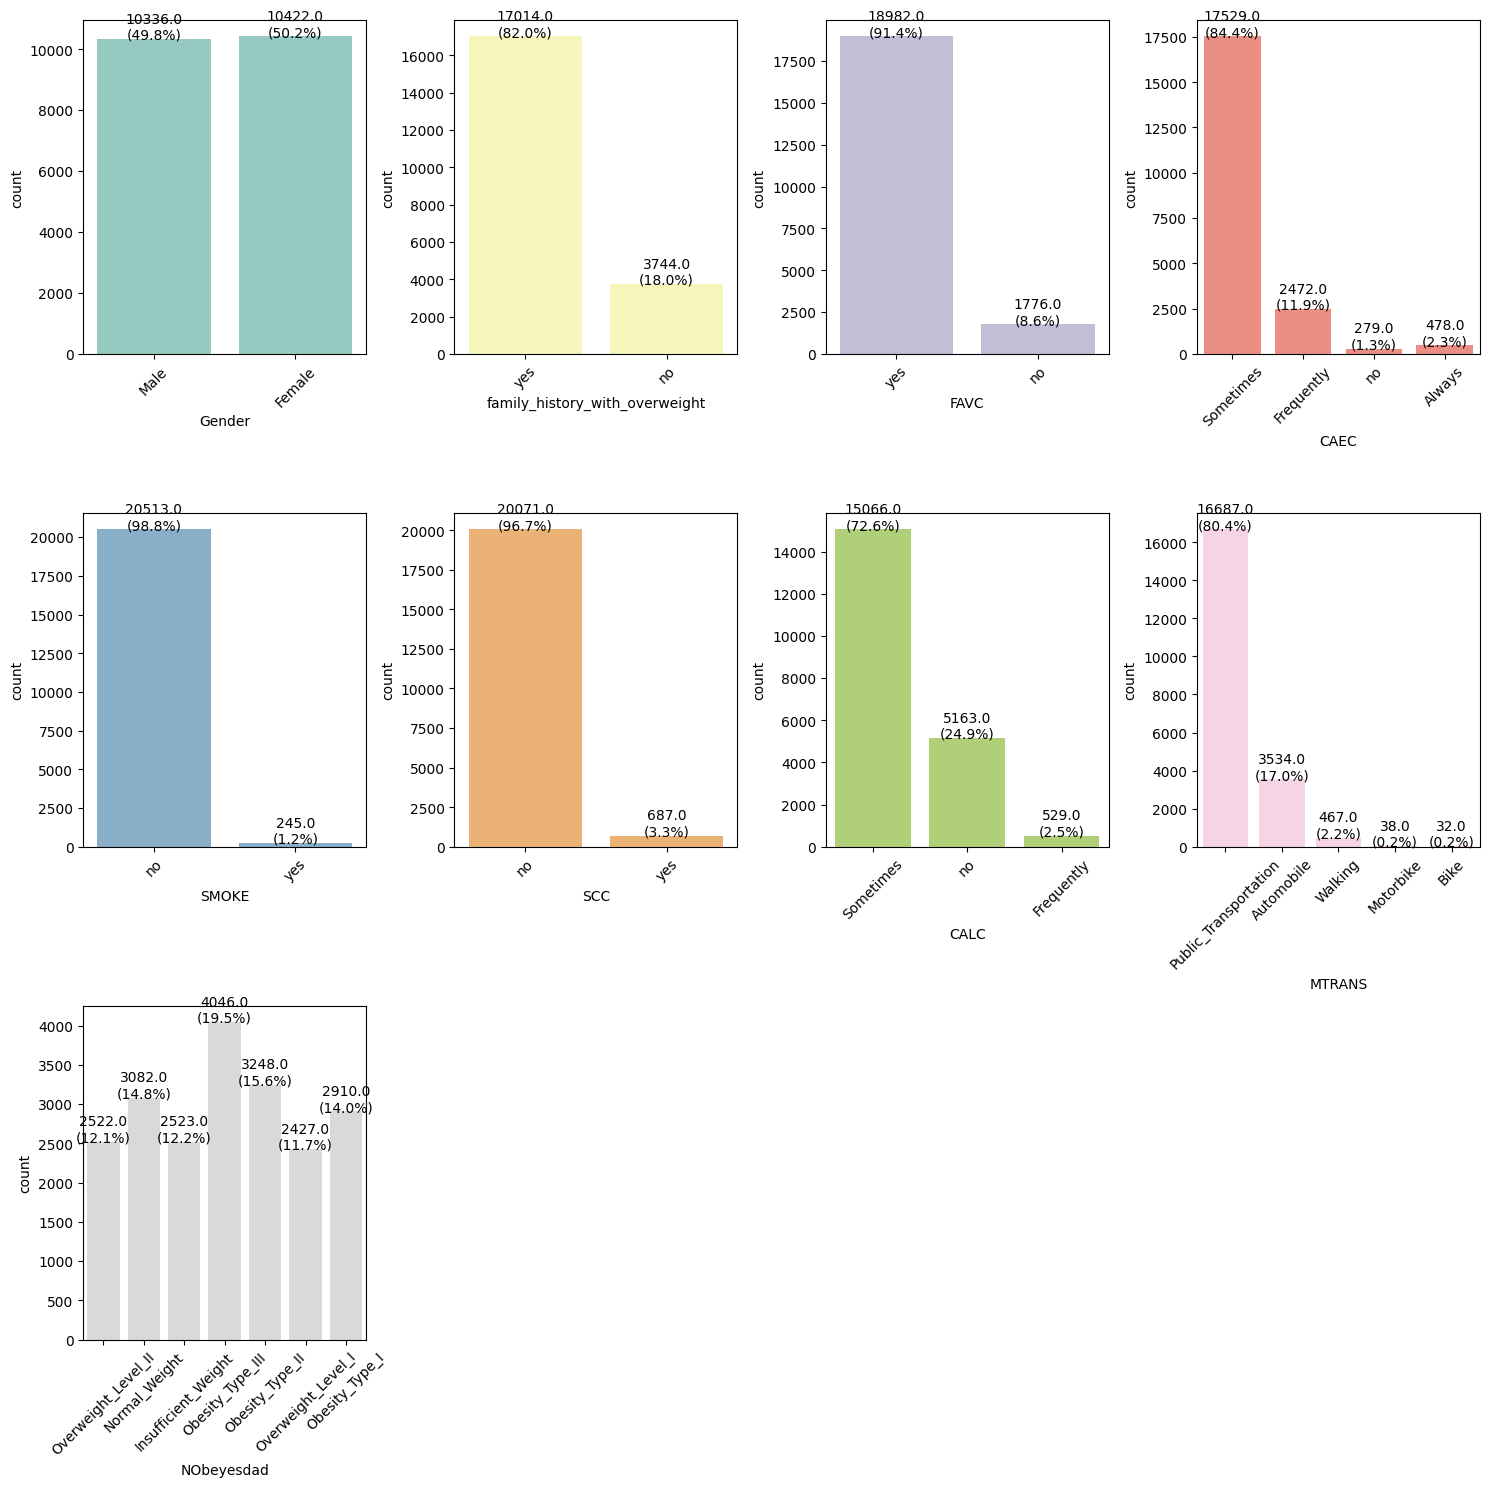

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming categorical_columns is a list of your categorical column names
# You can define a color palette based on the number of unique categories in the column
color_palette = sns.color_palette("Set3", n_colors=len(categorical_columns))

# Calculate the number of rows and columns based on the number of categorical columns
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / 4)  # Assuming 4 columns per row

# Set the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create subplots with multiple rows
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 4, i)
    
    # Use the defined color for each category
    sns.countplot(data=df, x=column, color=color_palette[i-1])
    
    # Add count and percentage annotations
    total = len(df[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}\n({height/total:.1%})', ha="center")

    # Rotate x-axis labels
    plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.tight_layout()
plt.show()

### Analysis

1. These features, including caec, calc, mtrans, and nobeyesdad, consist of multiple classes.


### Plotting Histogram

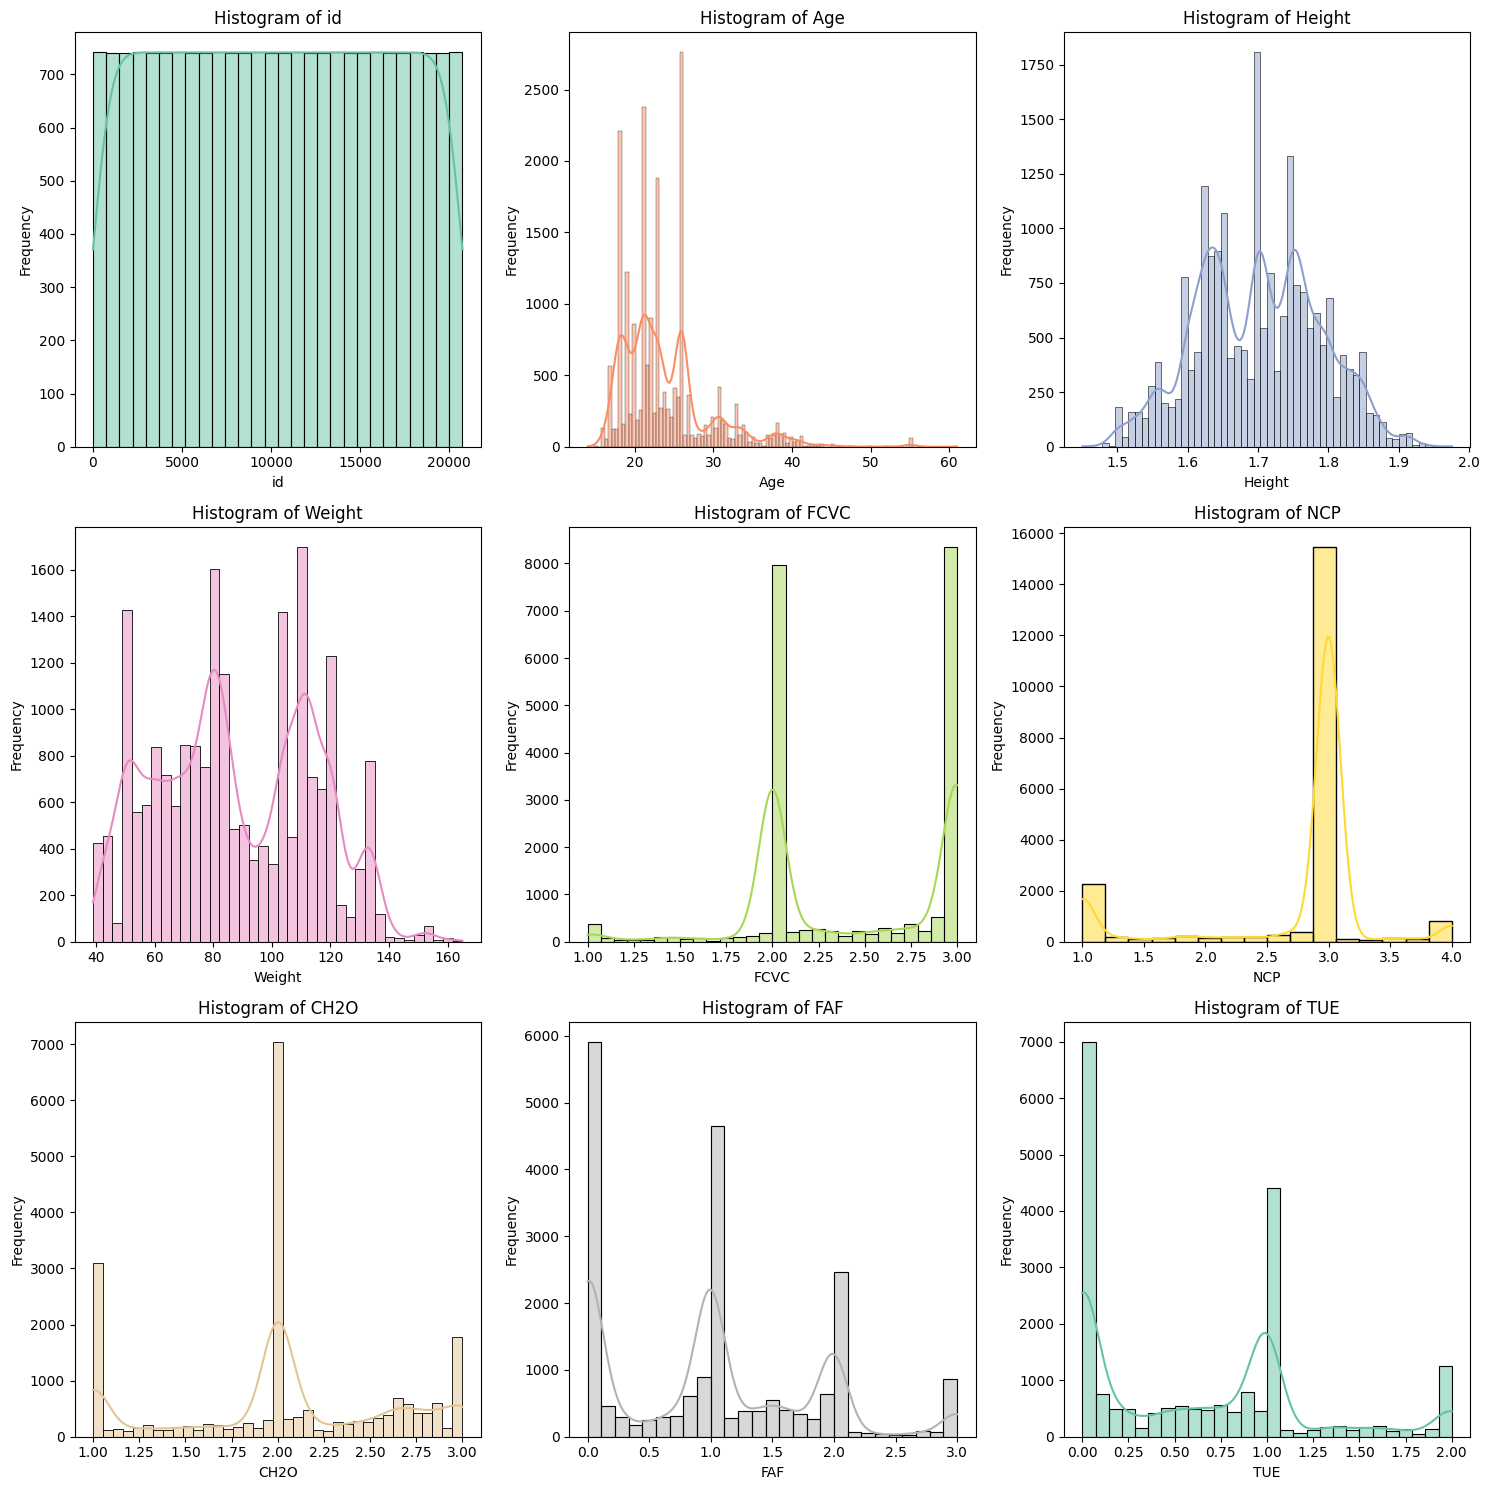

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming numerical_columns is a list of your numerical column names
# You can define a color palette based on the number of unique categories in the column
color_palette = sns.color_palette("Set2", n_colors=len(numerical_columns))

# Calculate the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # Assuming 3 columns per row

# Set the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create subplots with multiple rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    
    # Use the defined color for each column
    sns.histplot(df[column], color=color_palette[i-1], kde=True)
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.tight_layout()
plt.show()


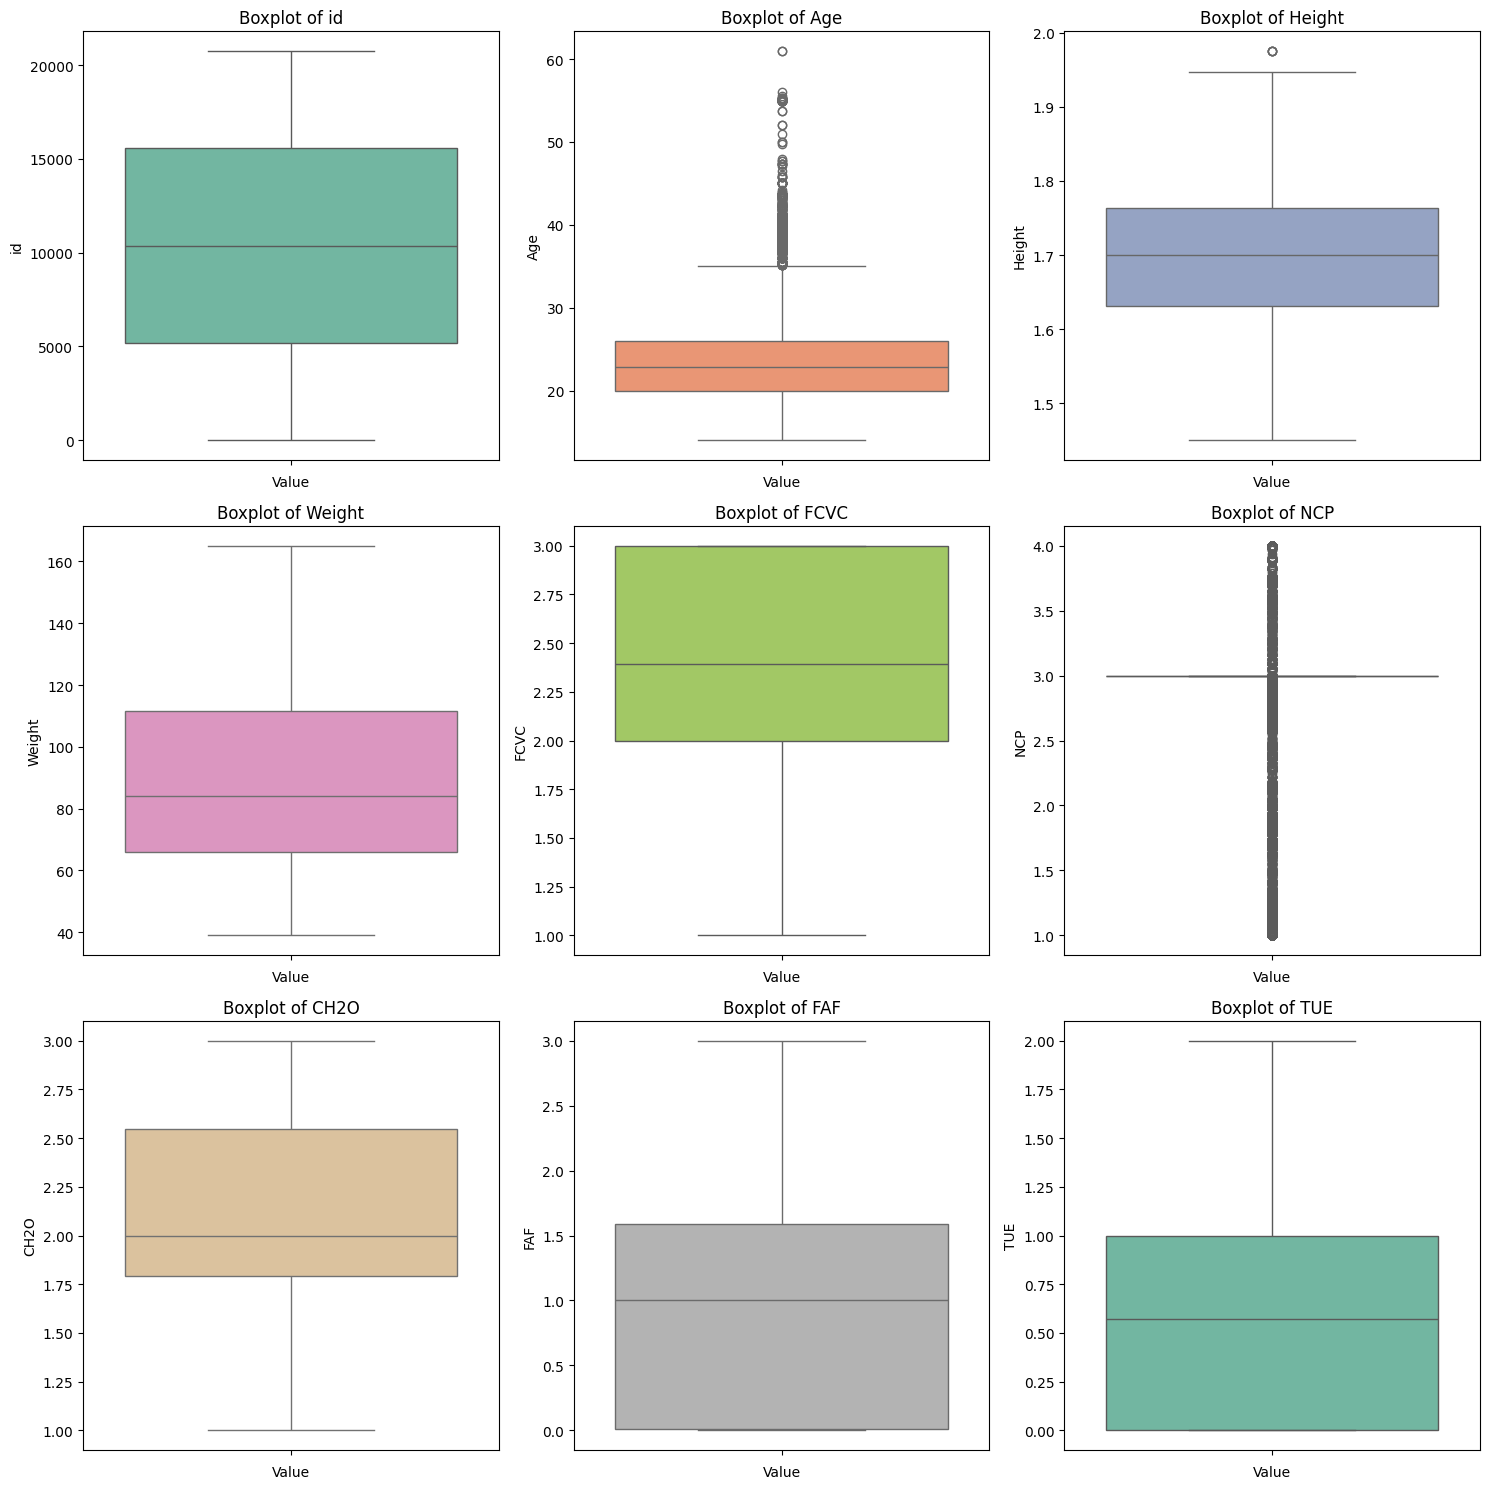

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming numerical_columns is a list of your numerical column names
# You can define a color palette based on the number of unique categories in the column
color_palette = sns.color_palette("Set2", n_colors=len(numerical_columns))

# Calculate the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # Assuming 3 columns per row

# Set the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create subplots with multiple rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    
    # Use the defined color for each column
    sns.boxplot(y=df[column], color=color_palette[i-1])
    
    # Add labels and title
    plt.ylabel(column)
    plt.xlabel('Value')
    plt.title(f'Boxplot of {column}')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.tight_layout()
plt.show()

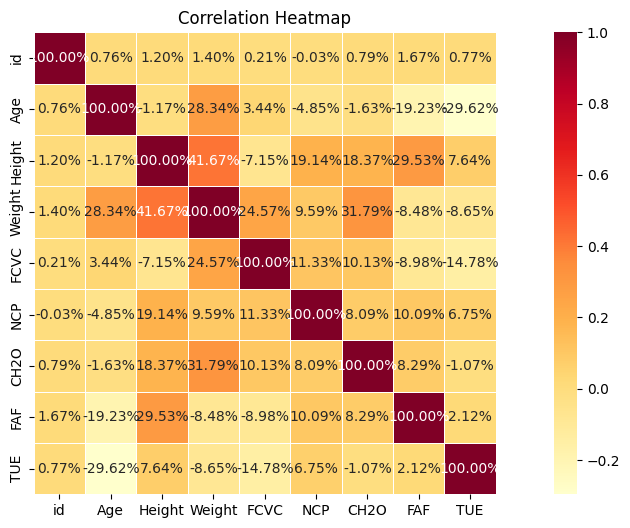

In [9]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt='.2%', cmap='YlOrRd', linewidths=0.5, square=True)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [10]:
df.head(1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df.head(1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


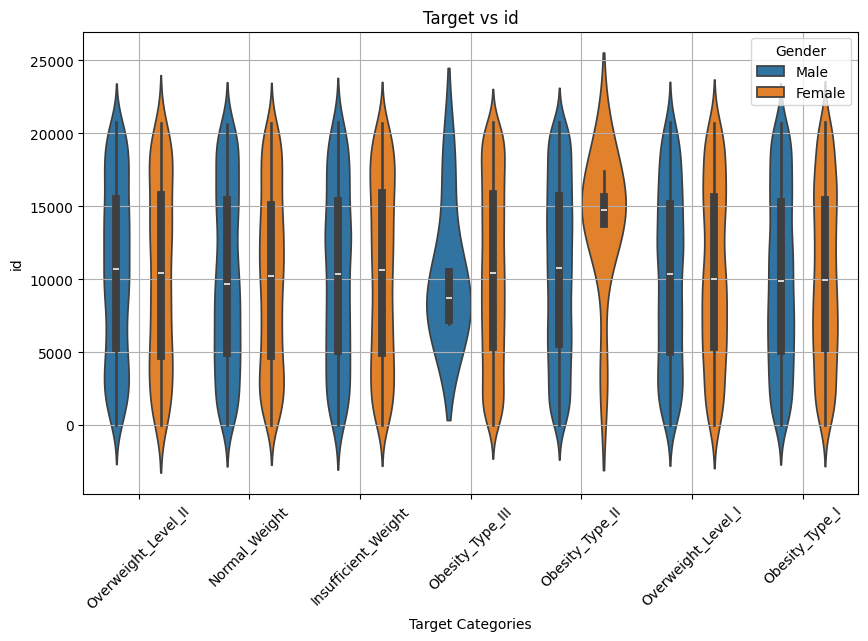

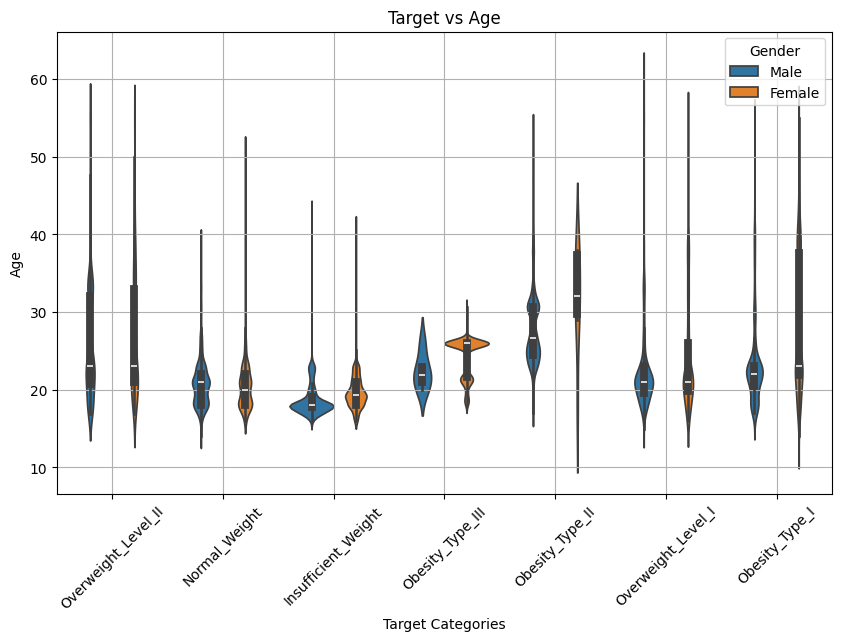

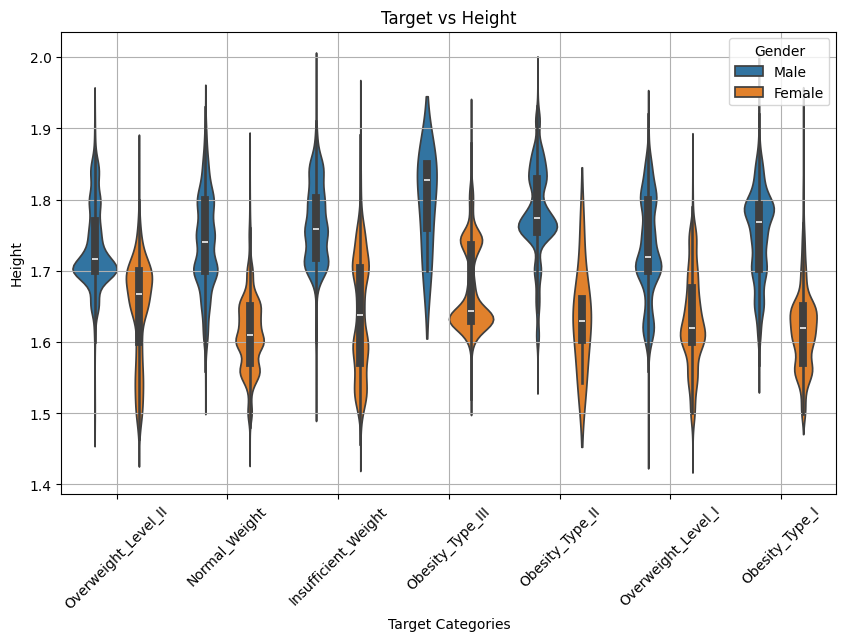

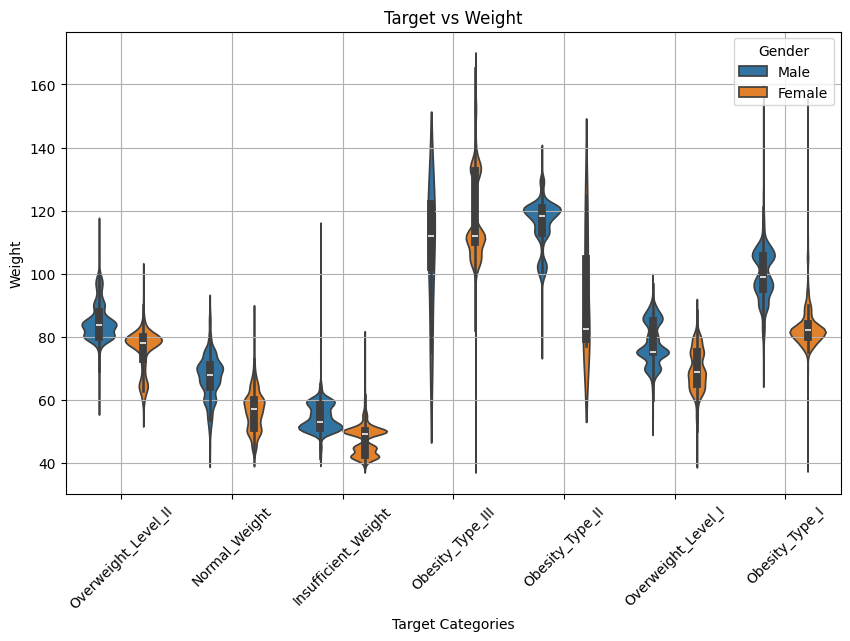

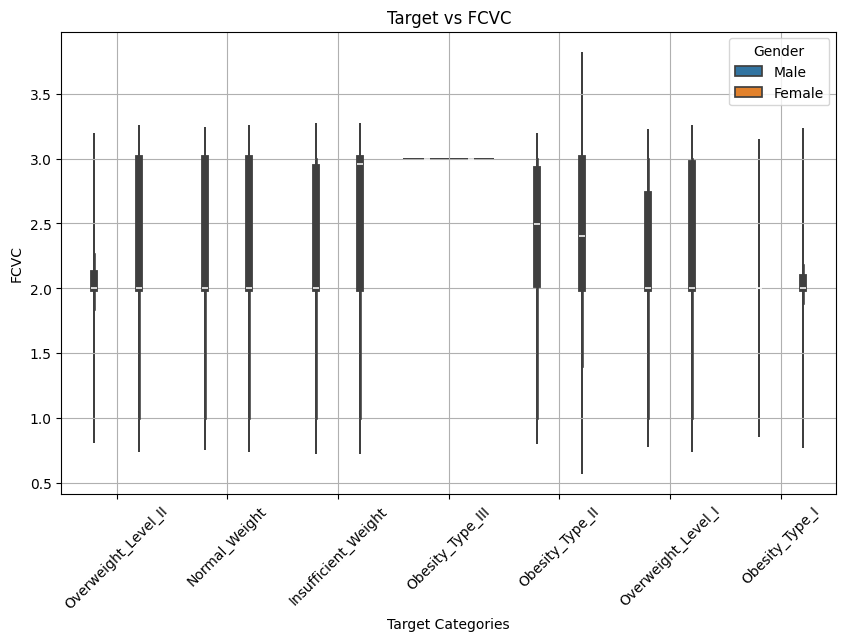

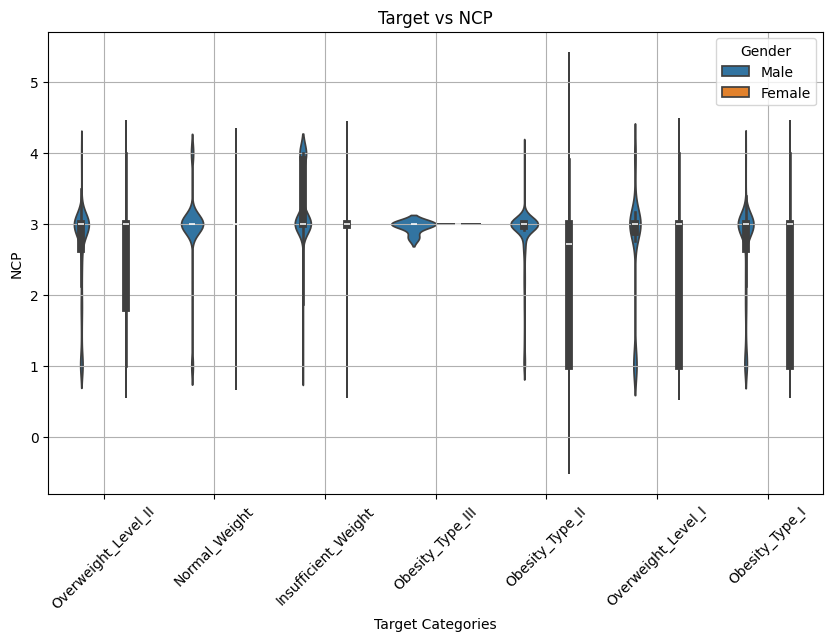

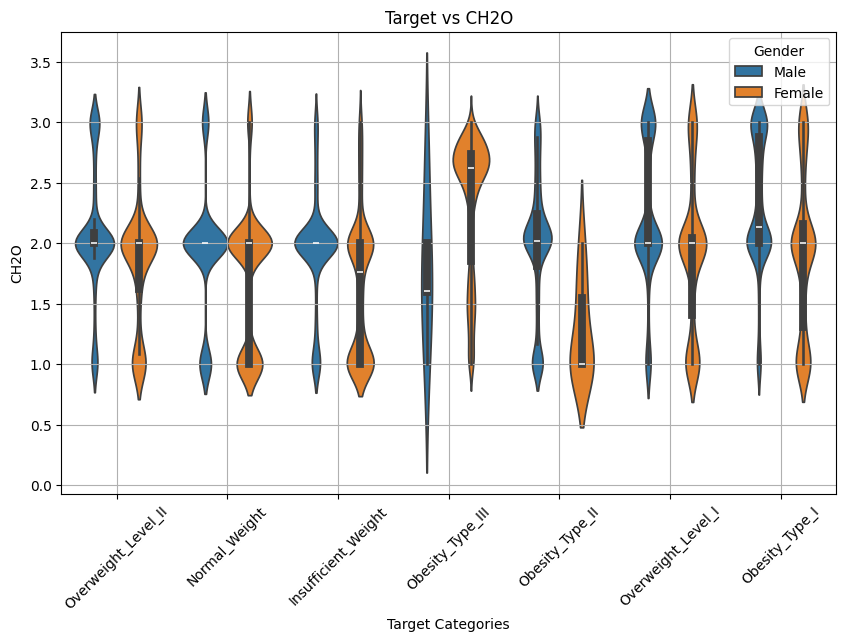

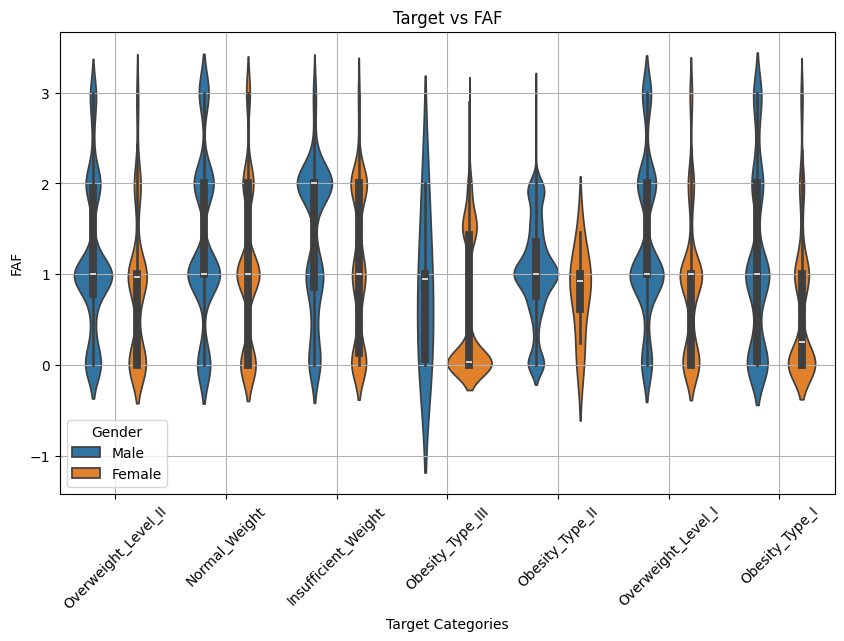

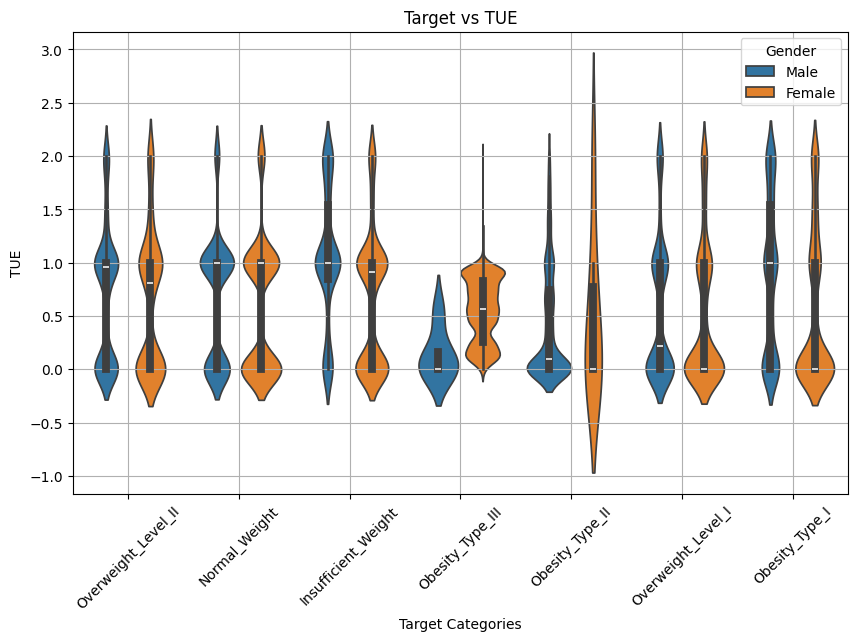

In [12]:
for i in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df, x="NObeyesdad", y=i,hue = "Gender") ## this line giving me overlapping graph
    plt.title(f'Target vs {i}')
    plt.xlabel('Target Categories')
    plt.ylabel(i)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

###  GROUP BY ANALYSIS

In [13]:
df.head(2)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.00000,yes,yes,2.0,3.000000,Frequently,no,2.000000,no,1.0,1.000000,no,Automobile,Normal_Weight


In [14]:
df.groupby(['NObeyesdad']).agg(
    age_mean = pd.NamedAgg("Age","mean"),
    Height = pd.NamedAgg("Height","mean"),
    Weight = pd.NamedAgg("Weight","mean"),
    ).sort_values(by="Weight")

,age_mean,Height,Weight
NObeyesdad,,,
Insufficient_Weight,19.336502,1.683693,49.860773
Normal_Weight,20.801388,1.670744,61.533289
Overweight_Level_I,23.045197,1.686880,74.228266
Overweight_Level_II,26.032084,1.706163,82.085513
Obesity_Type_I,25.023615,1.693509,92.371026
Obesity_Type_II,27.707128,1.782715,115.995914
Obesity_Type_III,24.126847,1.676007,117.697452


## Analysis:
1. Mean age increases consistently across all weight categories.
2. Height remains relatively stable across the weight classifications.
3. Mean weight shows a noticeable upward trend with increasing age.
4. This suggests a potential correlation between age and weight gain.
5. Understanding these trends can inform targeted health interventions for different age groups.

In [15]:
df.head(1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
multiclass_categorical_feature = {}
binaryClass_categorical_feature = {}
for i in categorical_columns:
    if df[i].nunique()<=2:
        binaryClass_categorical_feature[i] = list(df[i].unique())
        pass
    else:
        multiclass_categorical_feature[i]=list(df[i].unique())

In [17]:
binaryClass_categorical_feature

{'Gender': ['Male', 'Female'],
 'family_history_with_overweight': ['yes', 'no'],
 'FAVC': ['yes', 'no'],
 'SMOKE': ['no', 'yes'],
 'SCC': ['no', 'yes']}

In [18]:
multiclass_categorical_feature

{'CAEC': ['Sometimes', 'Frequently', 'no', 'Always'],
 'CALC': ['Sometimes', 'no', 'Frequently'],
 'MTRANS': ['Public_Transportation',
  'Automobile',
  'Walking',
  'Motorbike',
  'Bike'],
 'NObeyesdad': ['Overweight_Level_II',
  'Normal_Weight',
  'Insufficient_Weight',
  'Obesity_Type_III',
  'Obesity_Type_II',
  'Overweight_Level_I',
  'Obesity_Type_I']}